## a. Preprocess the dataset as specified in the data mining process.

### I. Produce Q-Q Plots and Histograms of the features, and apply the transformations if required.

Load the Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Employee.csv')  # Replace with your actual file name

Produce Q-Q Plots and Histograms

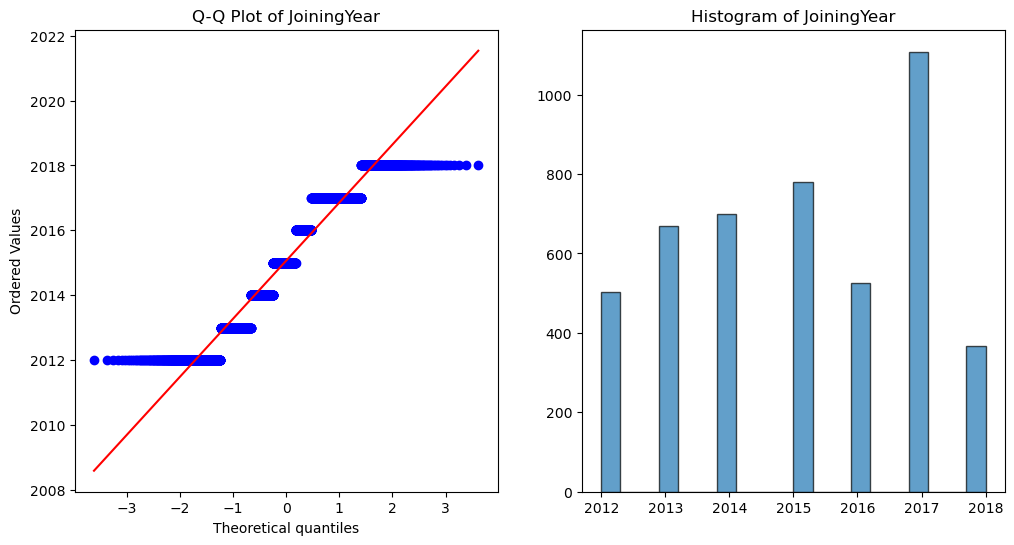

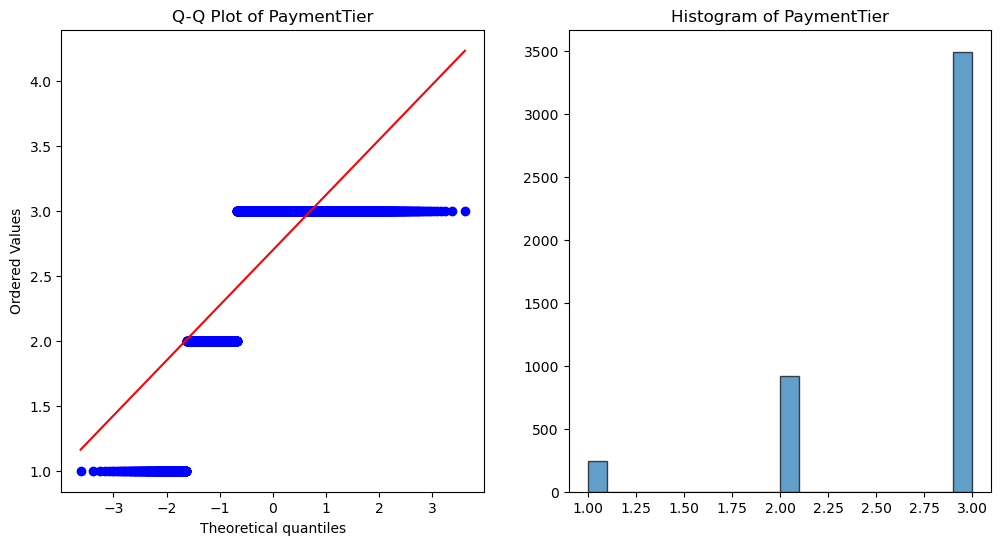

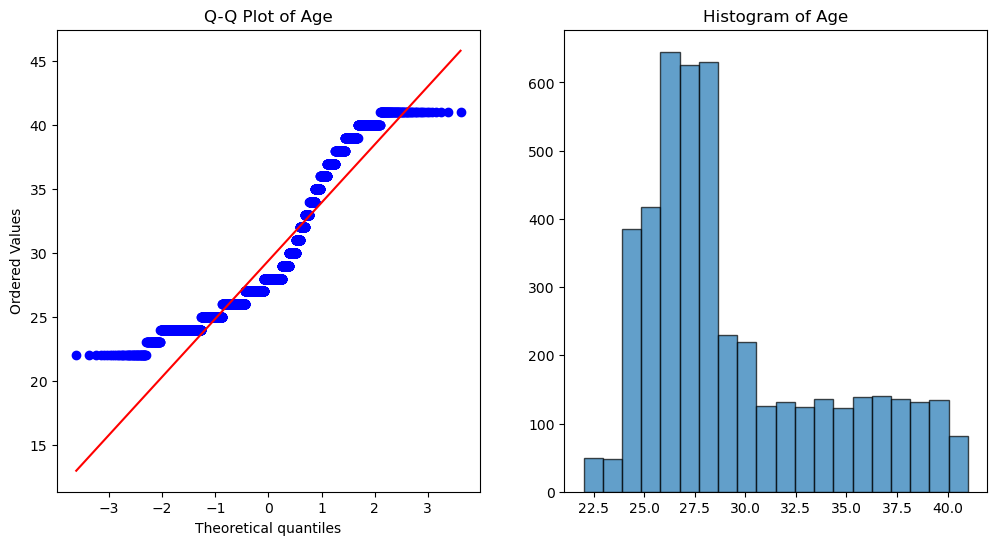

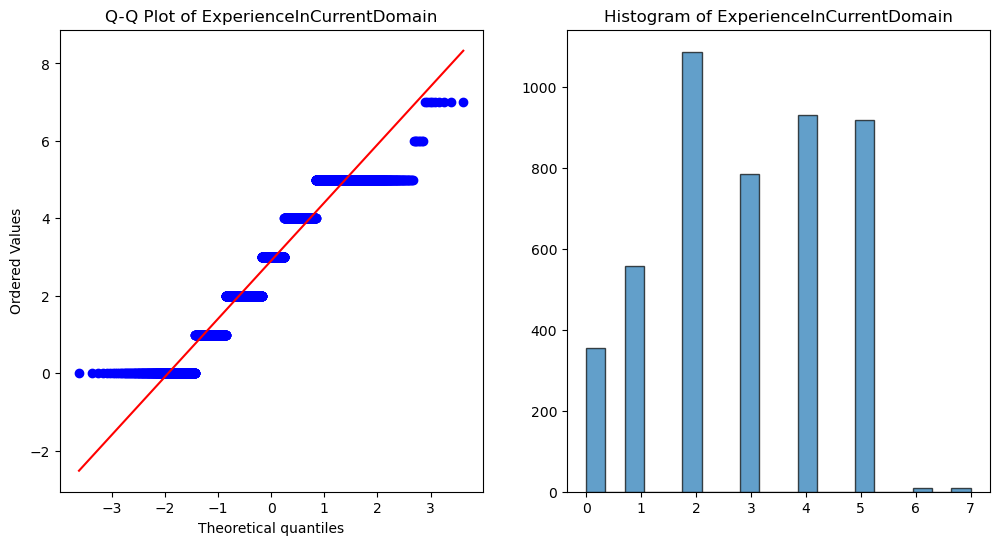

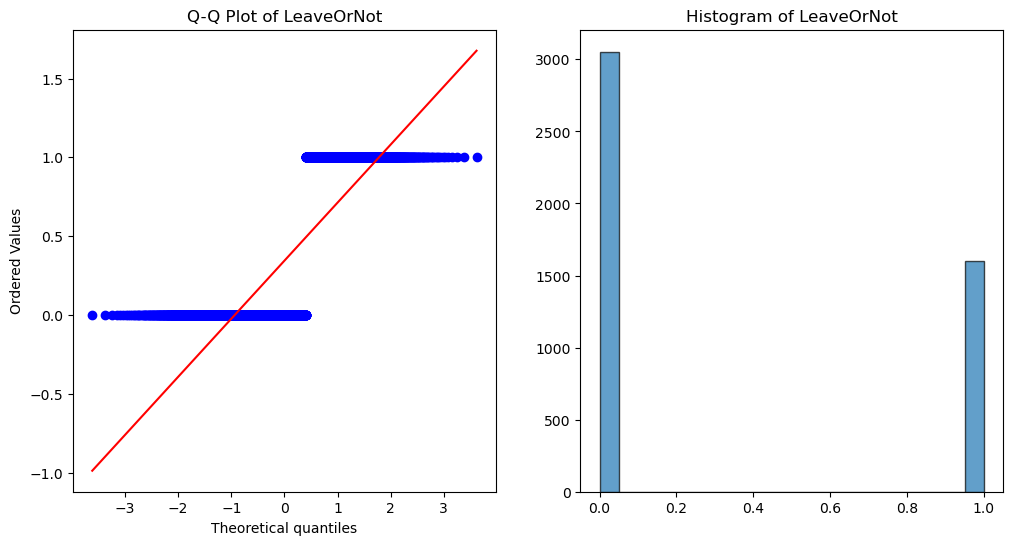

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import probplot

for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.subplot(1, 2, 2)
    plt.hist(df[column], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.show()


### II. If it is required, apply suitable feature coding techniques.



To identify Categorical Variables

In [3]:
print(df.dtypes)

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object


Encode Categorical Variables:

Label Encoding (for ordinal features - Education):

In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to ordinal categorical variables
df['Education'] = label_encoder.fit_transform(df['Education'])


One-Hot Encoding (For nominal variables - City, Gender, EverBenched)

In [5]:
# Apply One-Hot Encoding to nominal categorical variables
df = pd.get_dummies(df, columns=['City', 'Gender', 'EverBenched'], drop_first=True)

The transformed data

In [6]:
print(df.head())

   Education  JoiningYear  PaymentTier  Age  ExperienceInCurrentDomain  \
0          0         2017            3   34                          0   
1          0         2013            1   28                          3   
2          0         2014            3   38                          2   
3          1         2016            3   27                          5   
4          1         2017            3   24                          2   

   LeaveOrNot  City_New Delhi  City_Pune  Gender_Male  EverBenched_Yes  
0           0           False      False         True            False  
1           1           False       True        False            False  
2           0            True      False        False            False  
3           1           False      False         True            False  
4           1           False       True         True             True  


Verifying all the categorical variables have been transformed 

In [7]:
print(df.dtypes)

Education                    int32
JoiningYear                  int64
PaymentTier                  int64
Age                          int64
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
City_New Delhi                bool
City_Pune                     bool
Gender_Male                   bool
EverBenched_Yes               bool
dtype: object


Transform bool to int 

In [8]:
df[['City_New Delhi', 'City_Pune', 'Gender_Male', 'EverBenched_Yes']] = df[
    ['City_New Delhi', 'City_Pune', 'Gender_Male', 'EverBenched_Yes']
].astype(int)

Verify the transform

In [9]:
print(df.dtypes)

Education                    int32
JoiningYear                  int64
PaymentTier                  int64
Age                          int64
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
City_New Delhi               int32
City_Pune                    int32
Gender_Male                  int32
EverBenched_Yes              int32
dtype: object


### III. Scale and/or standardized the features, produce relevant graphs to show the scaling/ standardizing effect.
Separate features and target

In [10]:
X = df.drop('LeaveOrNot', axis=1)  # Features
Y = df['LeaveOrNot']  # Target

 Min-Max Scaling - Scales all features to a range, typically [0, 1].

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for visualization
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

Visualize the Effect : Compare Original and Transformed Features Plot histograms of original and scaled/standardized features to observe the differences.

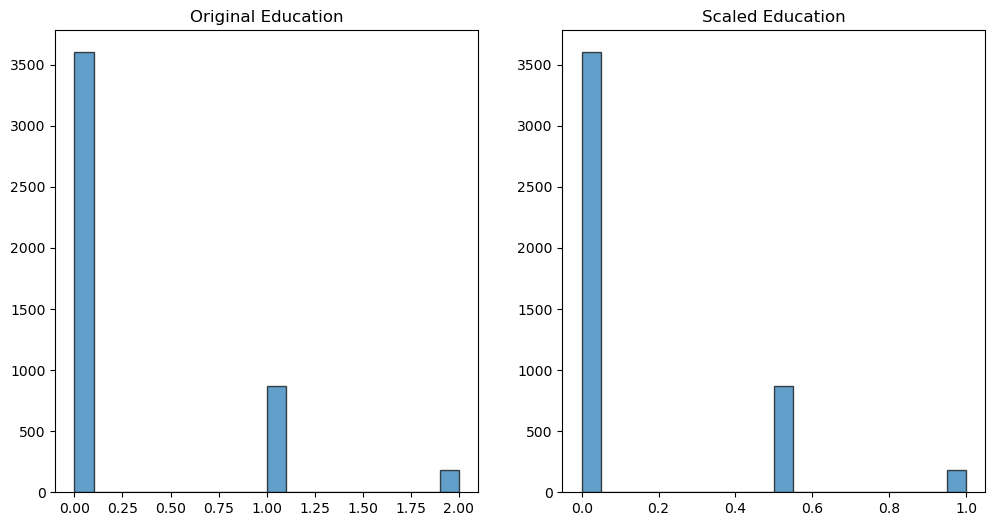

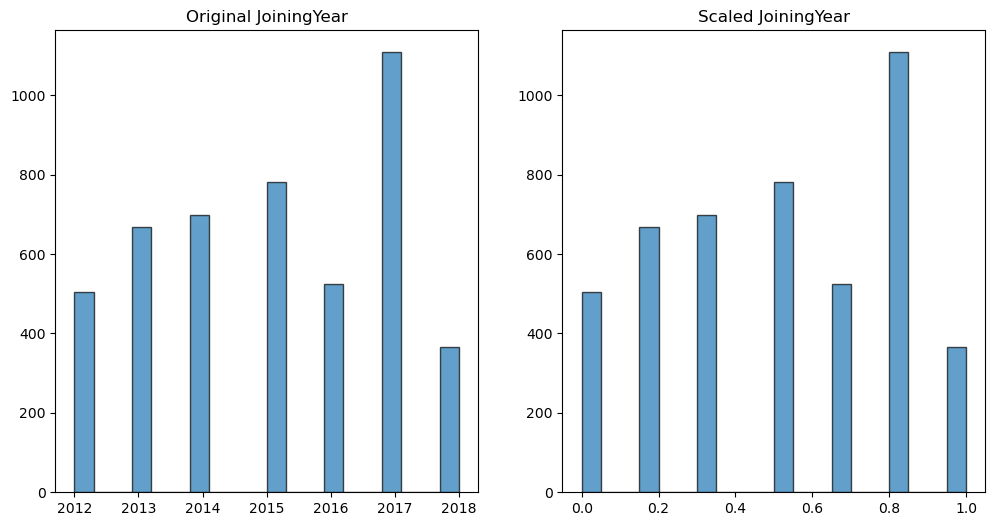

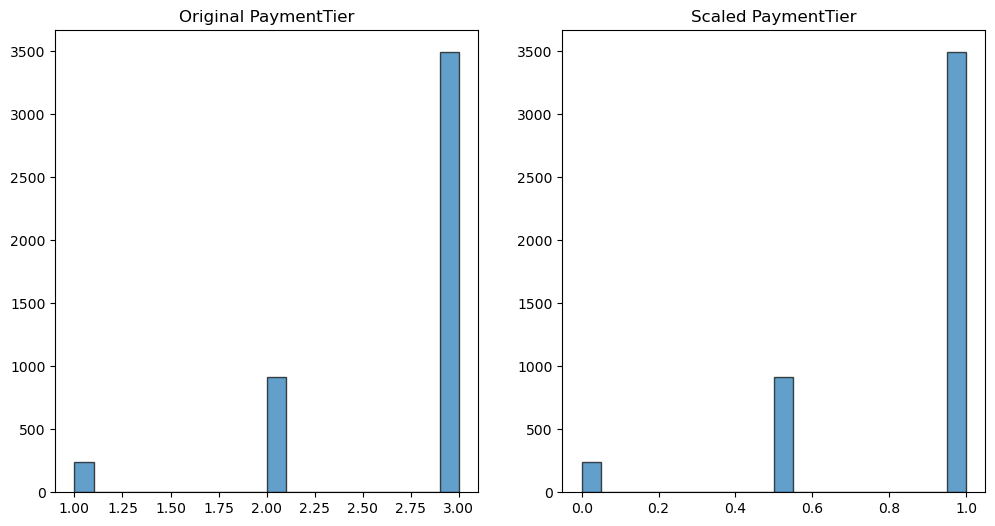

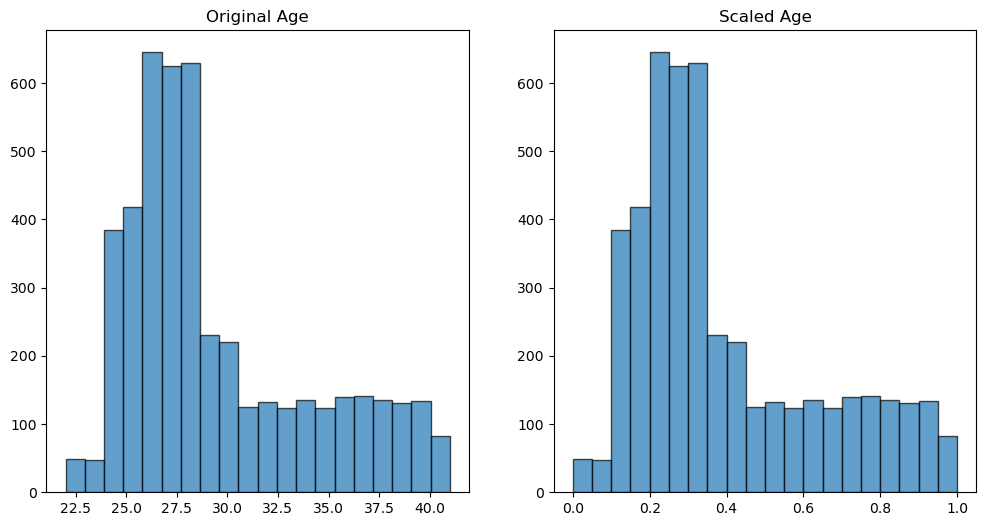

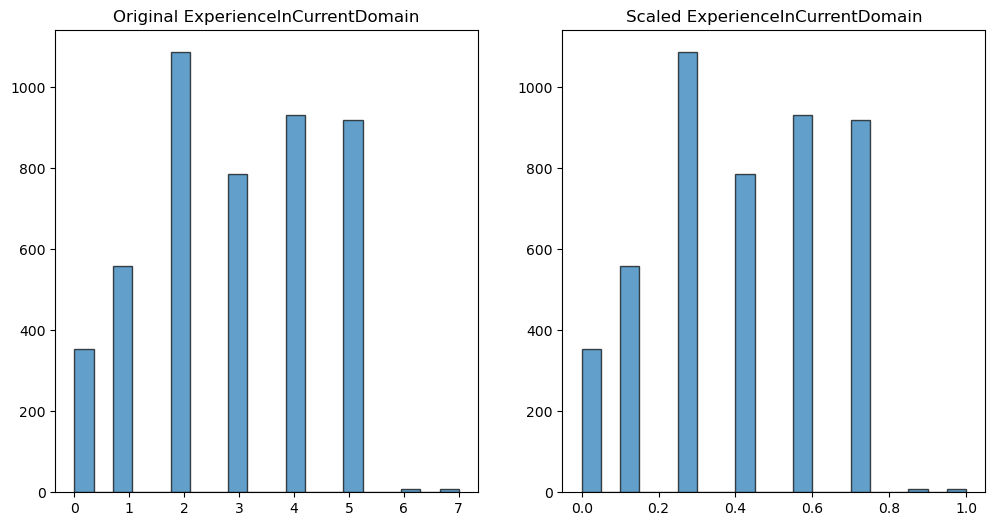

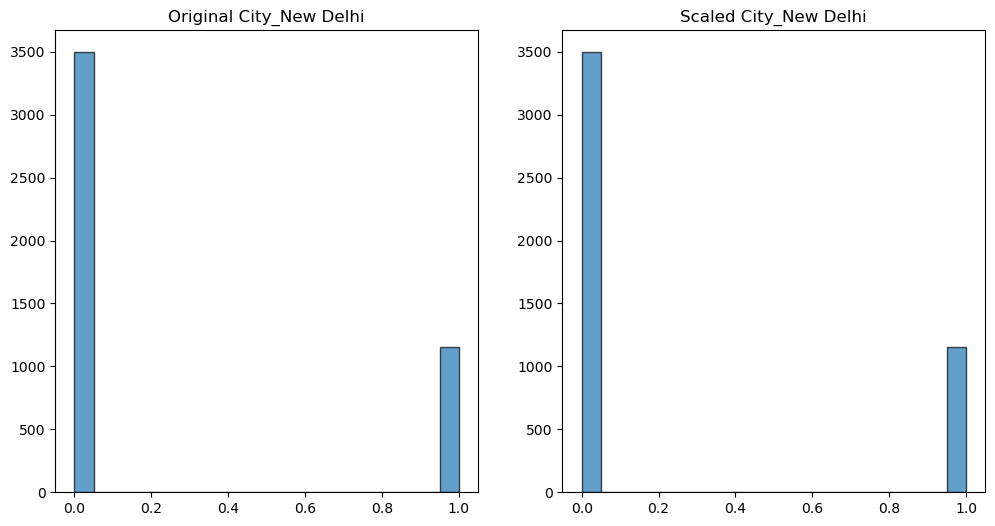

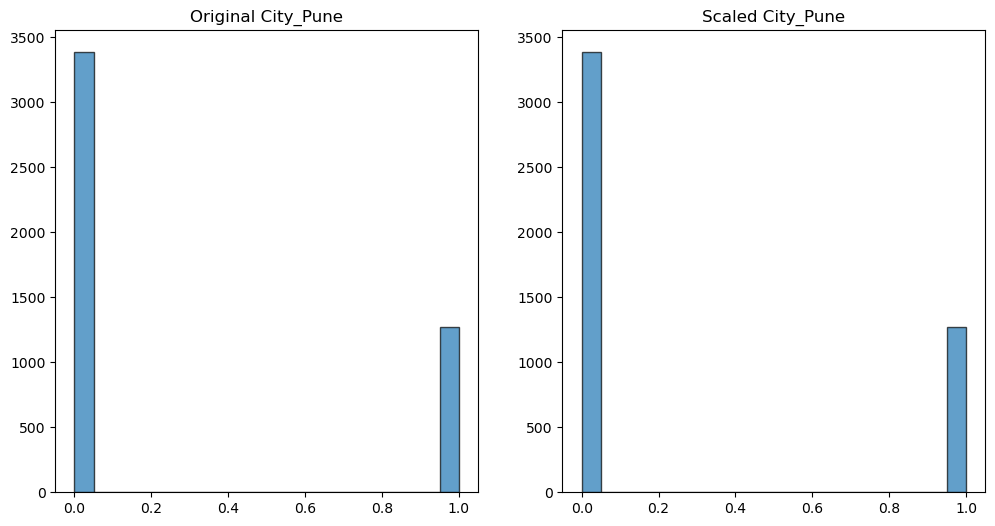

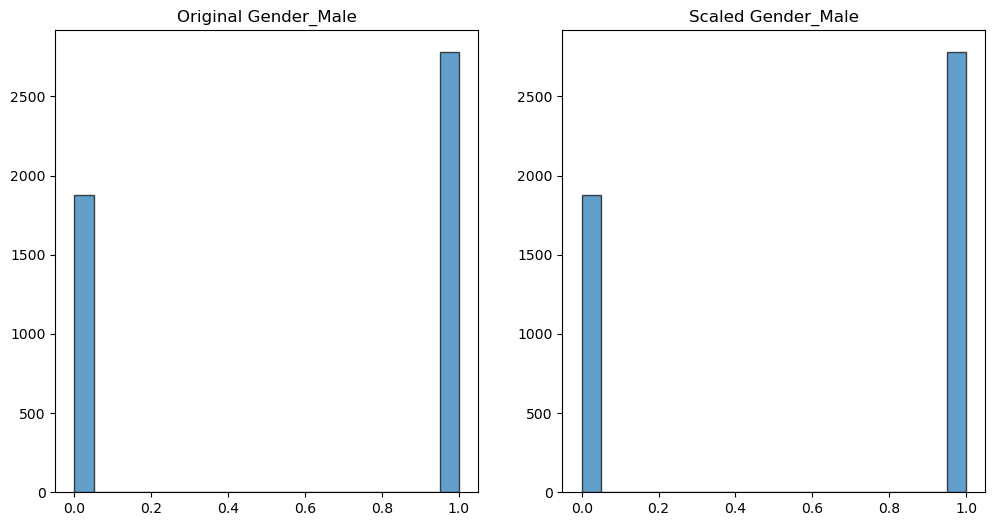

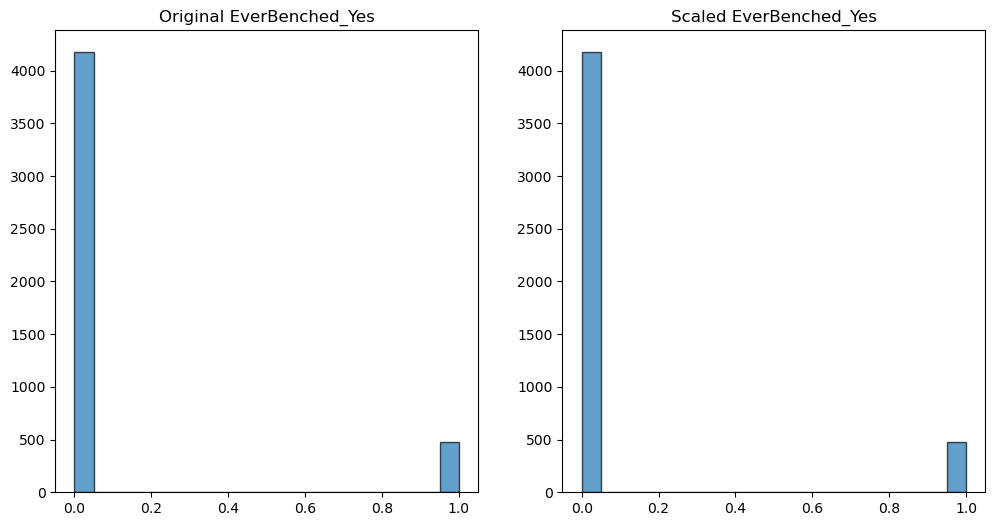

In [12]:
import matplotlib.pyplot as plt

# Plot histograms before and after scaling/standardization
for column in X.columns:
    plt.figure(figsize=(12, 6))
    
    # Original
    plt.subplot(1, 2, 1)
    plt.hist(X[column], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Original {column}')
    
    # Transformed (scaled or standardized)
    plt.subplot(1, 2, 2)
    plt.hist(X_scaled[column], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Scaled {column}')  # Replace with "Standardized" if using standardization
    
    plt.show()


Visualize the Effect : Box Plots to Check Distribution Changes

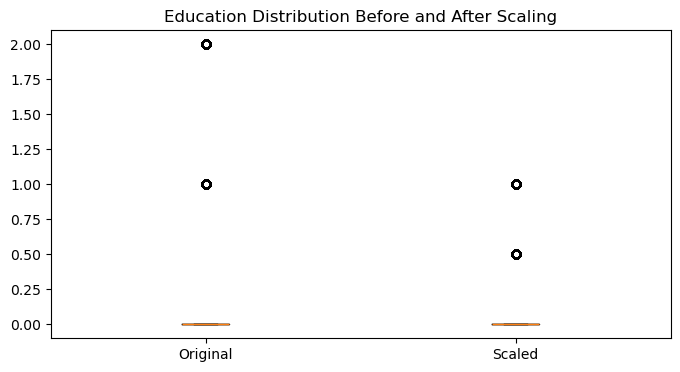

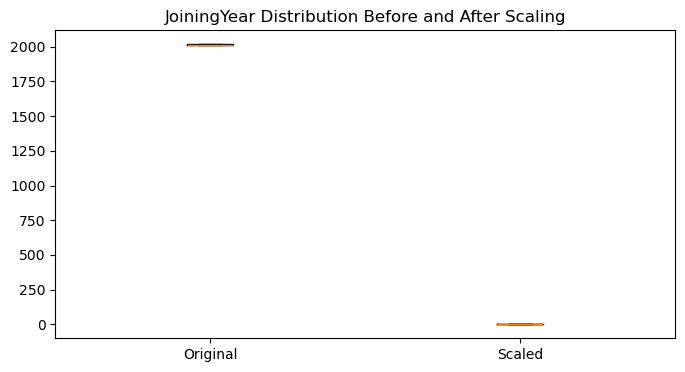

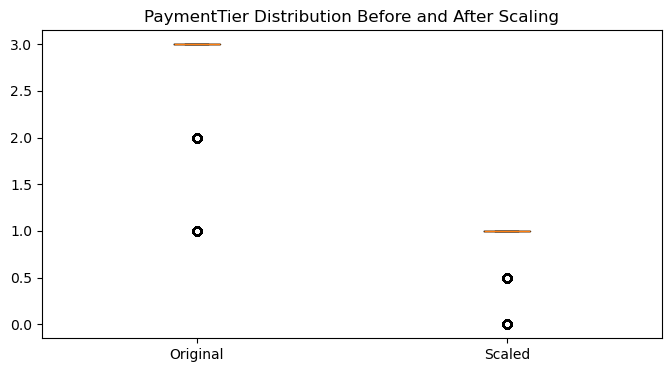

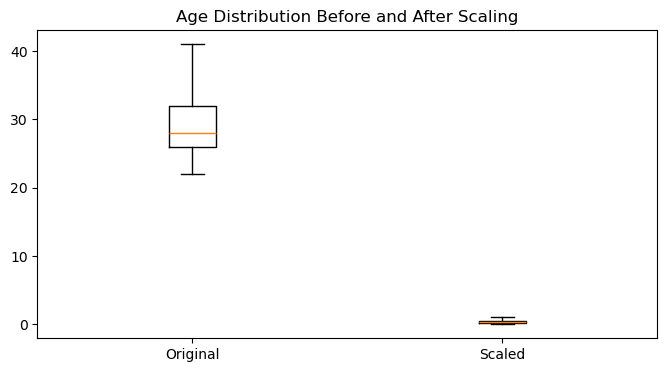

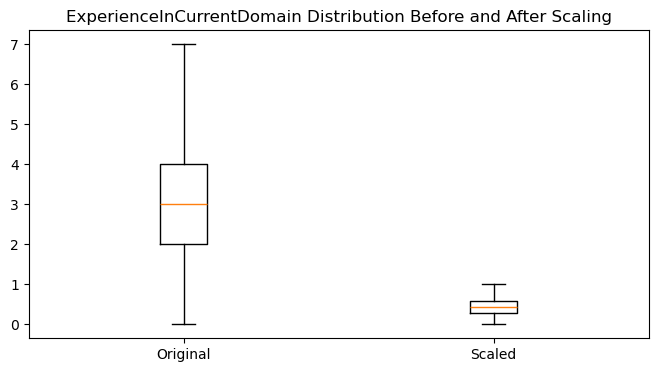

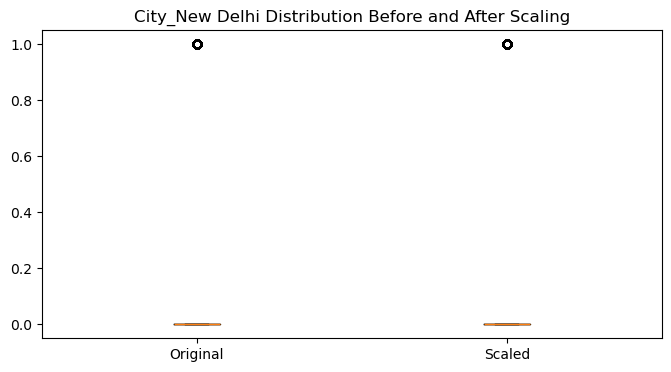

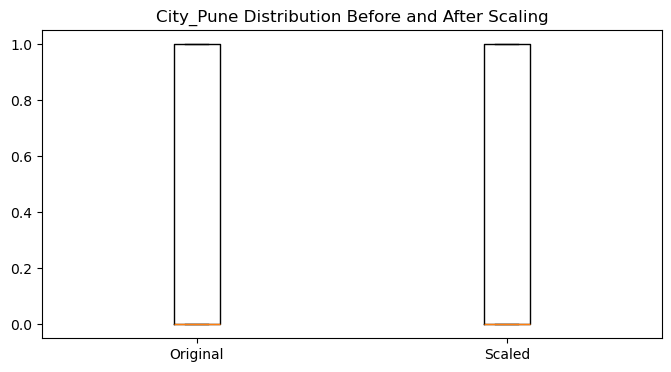

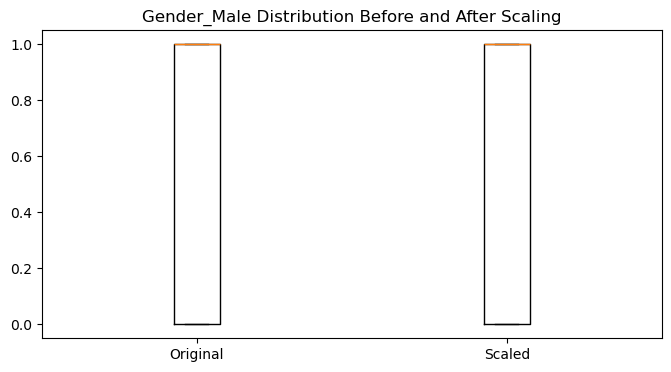

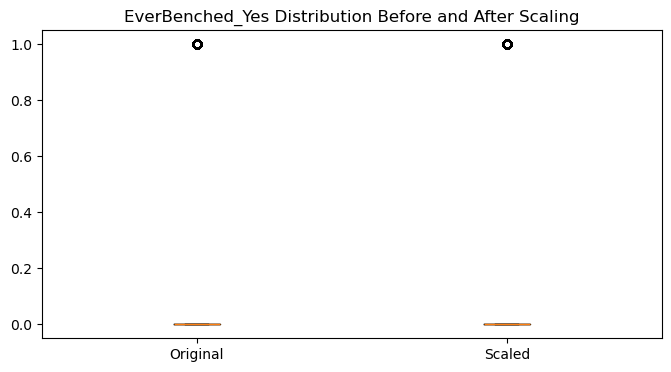

In [13]:
for column in X.columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot([X[column], X_scaled[column]], labels=['Original', 'Scaled'])
    plt.title(f'{column} Distribution Before and After Scaling')
    plt.show()

Update the Dataset - Once the scaling is applied, you can combine the scaled features with the target variable (LeaveOrNot) for model training.

In [14]:
# Concatenate scaled features and target variable
df_scaled = pd.concat([X_scaled, Y], axis=1)

Verify the Transformation - Check the statistical summary of the transformed data to ensure everything has been scaled correctly

In [15]:
print(df_scaled.describe())  # Should show that all feature values are in the range [0, 1]

        Education  JoiningYear  PaymentTier          Age  \
count  4653.00000  4653.000000  4653.000000  4653.000000   
mean      0.13228     0.510495     0.849130     0.389121   
std       0.26056     0.310563     0.280718     0.254005   
min       0.00000     0.000000     0.000000     0.000000   
25%       0.00000     0.166667     1.000000     0.210526   
50%       0.00000     0.500000     1.000000     0.315789   
75%       0.00000     0.833333     1.000000     0.526316   
max       1.00000     1.000000     1.000000     1.000000   

       ExperienceInCurrentDomain  City_New Delhi    City_Pune  Gender_Male  \
count                4653.000000     4653.000000  4653.000000  4653.000000   
mean                    0.415093        0.248657     0.272512     0.597034   
std                     0.222606        0.432281     0.445300     0.490547   
min                     0.000000        0.000000     0.000000     0.000000   
25%                     0.285714        0.000000     0.000000     0.0

Save the Transformed Data to a New CSV File

In [16]:
# Save the transformed data to a new CSV file
df_scaled.to_csv('scaled_employee_dataset.csv', index=False)

### IV. If necessary, apply feature discretization, and produce a relevant graph to show the discretization

Discretize the continuous features JoiningYear, Age, and ExperienceInCurrentDomain using equal-width and equal-frequency binning.

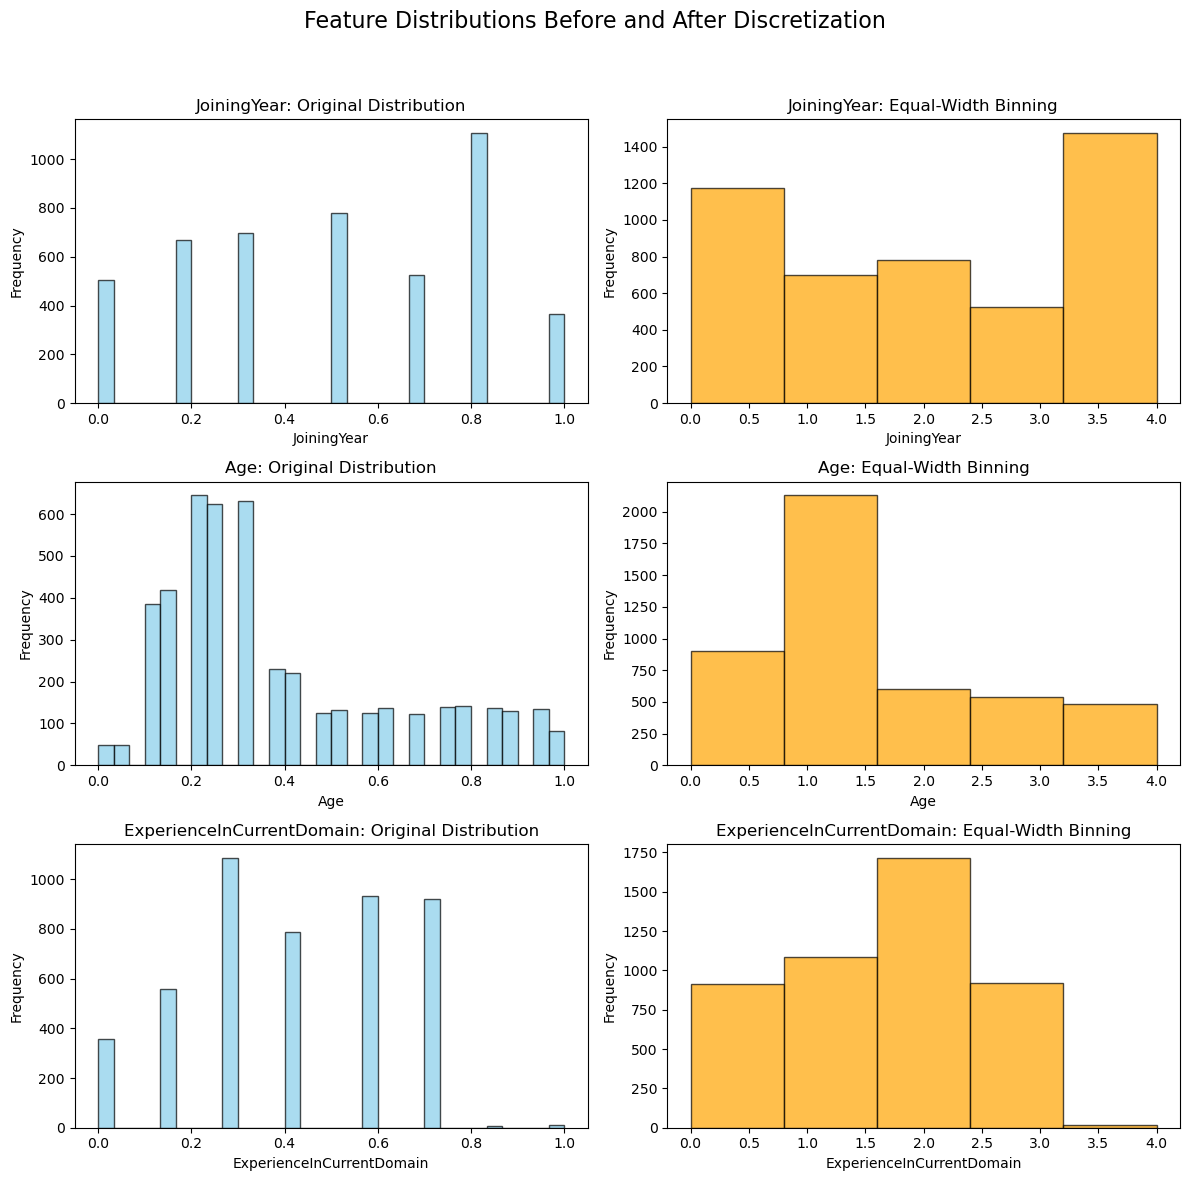

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
scaled_df = pd.read_csv('scaled_employee_dataset.csv')

# Continuous features to discretize
features_to_discretize = ['JoiningYear', 'Age', 'ExperienceInCurrentDomain']

# Create subplots
fig, axes = plt.subplots(len(features_to_discretize), 2, figsize=(12, 12))
fig.suptitle('Feature Distributions Before and After Discretization', fontsize=16)

# Iterate through the features and apply discretization
for i, feature in enumerate(features_to_discretize):
    # Check if the feature exists in the dataset
    if feature not in scaled_df.columns:
        print(f"Feature '{feature}' not found in the dataset!")
        continue

    # Original distribution
    axes[i, 0].hist(scaled_df[feature], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
    axes[i, 0].set_title(f'{feature}: Original Distribution')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Frequency')
    
    # Equal-width binning
    num_bins = 5  # Example: 5 bins
    scaled_df[f'{feature}_equal_width'] = pd.cut(scaled_df[feature], bins=num_bins, labels=False)
    
    # Equal-frequency binning (with duplicates handled)
    scaled_df[f'{feature}_equal_freq'] = pd.qcut(
        scaled_df[feature],
        q=num_bins,
        labels=False,
        duplicates='drop'
    )
    
    # Discretized distribution (Equal-width bins)
    axes[i, 1].hist(scaled_df[f'{feature}_equal_width'], bins=num_bins, color='orange', alpha=0.7, edgecolor='black')
    axes[i, 1].set_title(f'{feature}: Equal-Width Binning')
    axes[i, 1].set_xlabel(feature)
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## b. Develop a MLP for binary classification.

Prepare Data for Model Training

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the discretized and scaled dataset
df = pd.read_csv('scaled_employee_dataset.csv')

# Separate features and target
X = df.drop('LeaveOrNot', axis=1)  # Features
Y = df['LeaveOrNot']  # Target

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Convert Data to PyTorch Tensors

In [19]:
import torch

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32).unsqueeze(1)  # Reshape to 2D for binary classification

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test.values, dtype=torch.float32).unsqueeze(1)


Defined a simple MLP with two hidden layers.

In [20]:
import torch.nn as nn

class MLPModel(nn.Module):
    def __init__(self, input_size):
        super(MLPModel, self).__init__()
        
        # Define the layers
        self.fc1 = nn.Linear(input_size, 64)  # First hidden layer
        self.fc2 = nn.Linear(64, 32)         # Second hidden layer
        self.fc3 = nn.Linear(32, 1)          # Output layer (binary classification)
        self.relu = nn.ReLU()                # ReLU activation
        self.sigmoid = nn.Sigmoid()          # Sigmoid for binary classification output
    
    def forward(self, x):
        x = self.relu(self.fc1(x))  # Apply first layer + ReLU
        x = self.relu(self.fc2(x))  # Apply second layer + ReLU
        x = self.sigmoid(self.fc3(x))  # Apply output layer + Sigmoid
        return x


Initialize the model, the loss function (binary cross-entropy), and the optimizer (Adam).

In [21]:
# Initialize the model
input_size = X_train.shape[1]  # Number of features
model = MLPModel(input_size)

# Binary Cross-Entropy Loss (for binary classification)
criterion = nn.BCELoss()

# Optimizer (Adam)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


Train the MLP model using the training data.

In [22]:
# Number of epochs
epochs = 20

# Training loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    # Loop through the training data in batches
    for i in range(0, len(X_train_tensor), 32):  # Batch size = 32
        inputs = X_train_tensor[i:i+32]
        targets = Y_train_tensor[i:i+32]
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Calculate loss
        loss = criterion(outputs, targets)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        running_loss += loss.item()
    
    # Print loss every 5 epochs
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(X_train_tensor):.4f}")


Epoch [5/20], Loss: 0.0162
Epoch [10/20], Loss: 0.0149
Epoch [15/20], Loss: 0.0139
Epoch [20/20], Loss: 0.0131


Evaluate its performance on the test set.

In [23]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    # Test the model on the test data
    outputs = model(X_test_tensor)
    predicted = (outputs > 0.5).float()  # Convert probabilities to binary labels (0 or 1)
    total += Y_test_tensor.size(0)
    correct += (predicted == Y_test_tensor).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 83.89%


## c. Apply the following techniques to predict the value of Y

### I. Different wight initialization techniques

#### 1. He Initialization
Define the MLP Model with He Initialization

In [24]:
import torch
import torch.nn as nn
import torch.nn.init as init

class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_layer_sizes):
        super(MLPModel, self).__init__()

        layers = []
        prev_size = input_size

        # Define hidden layers with He Initialization
        for size in hidden_layer_sizes:
            layers.append(nn.Linear(prev_size, size))
            
            # Apply He initialization to the weights of each layer (for ReLU activation)
            init.kaiming_uniform_(layers[-1].weight, nonlinearity='relu')
            
            # Apply ReLU activation function
            layers.append(nn.ReLU())
            prev_size = size

        # Output layer
        layers.append(nn.Linear(prev_size, 1))
        layers.append(nn.Sigmoid())  # Sigmoid activation for binary classification output

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


Initialize Model, Loss Function, and Optimizer

In [25]:
# Assuming you have your data loaded (X_train, Y_train, X_test, Y_test)
# Convert data to PyTorch tensors if necessary

# Initialize the model with input size and hidden layers (e.g., [64, 32] for two hidden layers)
model = MLPModel(input_size=X_train.shape[1], hidden_layer_sizes=[64, 32])

# Binary Cross-Entropy Loss for binary classification
criterion = nn.BCELoss()

# Adam optimizer with learning rate of 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


Training the Model - Use the model, criterion (loss function), and optimizer to train the network.

In [27]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert your training data to PyTorch tensors (assuming X_train and Y_train are numpy arrays or pandas DataFrames)
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32).unsqueeze(1)  # Convert to 2D tensor for binary classification


In [28]:
# Create TensorDataset
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)

# Create DataLoader to batch the dataset
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  # Shuffle data for better training


In [29]:
epochs = 20
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    # Loop through the training data in batches
    for inputs, targets in train_loader:  # Now train_loader is defined
        optimizer.zero_grad()  # Zero the gradients
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, targets)
        
        # Backward pass
        loss.backward()  # Compute gradients
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
    
    # Print loss every 5 epochs for tracking
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {running_loss/len(train_loader):.4f}")


Epoch [5/20] - Loss: 0.5037
Epoch [10/20] - Loss: 0.4691
Epoch [15/20] - Loss: 0.4393
Epoch [20/20] - Loss: 0.4184


Evaluate the model on the test data to see how well it performs:

In [30]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    outputs = model(X_test_tensor)  # Assuming X_test_tensor is prepared
    predicted = (outputs > 0.5).float()  # Convert probabilities to binary labels (0 or 1)
    total += Y_test_tensor.size(0)
    correct += (predicted == Y_test_tensor).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 84.75%


Saved the trained model for future use

In [31]:
torch.save(model.state_dict(), 'mlp_he_initialized_model.pth')

#### 2. Xavier/Glorot Initialization:
Define the MLP Model with Xavier/Glorot Initialization

In [32]:
import torch
import torch.nn as nn
import torch.nn.init as init

class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_layer_sizes):
        super(MLPModel, self).__init__()

        layers = []
        prev_size = input_size

        # Define hidden layers
        for size in hidden_layer_sizes:
            layers.append(nn.Linear(prev_size, size))
            
            # Apply Xavier (Glorot) initialization to the weights
            init.xavier_uniform_(layers[-1].weight)  # Xavier initialization
            
            # Apply ReLU activation function (or any activation you prefer)
            layers.append(nn.ReLU())
            prev_size = size

        # Output layer
        layers.append(nn.Linear(prev_size, 1))
        layers.append(nn.Sigmoid())  # Sigmoid activation for binary classification output

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


 Initialize the Model, Loss Function, and Optimizer

In [33]:
# Assuming X_train, Y_train are already prepared (as numpy arrays or pandas DataFrames)
# Convert your training data to PyTorch tensors if necessary
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32).unsqueeze(1)  # Convert to 2D tensor for binary classification

# Initialize the model with input size and hidden layer sizes
model = MLPModel(input_size=X_train_tensor.shape[1], hidden_layer_sizes=[64, 32])

# Binary Cross-Entropy Loss for binary classification
criterion = nn.BCELoss()

# Adam optimizer with learning rate of 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


Train the model using the training loop.

In [34]:
epochs = 20
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    # Loop through the training data in batches (assuming train_loader is defined)
    for inputs, targets in train_loader:  # Assuming train_loader is prepared
        optimizer.zero_grad()  # Zero the gradients
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, targets)
        
        # Backward pass
        loss.backward()  # Compute gradients
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
    
    # Print loss every 5 epochs for tracking
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {running_loss/len(train_loader):.4f}")


Epoch [5/20] - Loss: 0.5050
Epoch [10/20] - Loss: 0.4635
Epoch [15/20] - Loss: 0.4306
Epoch [20/20] - Loss: 0.4035


Evaluate its performance on the test data

In [35]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    outputs = model(X_test_tensor)  # Assuming X_test_tensor is ready
    predicted = (outputs > 0.5).float()  # Convert probabilities to binary labels (0 or 1)
    total += Y_test_tensor.size(0)
    correct += (predicted == Y_test_tensor).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 84.53%


Saved the trained model for future use

In [36]:
torch.save(model.state_dict(), 'mlp_xavier_initialized_model.pth')

### II. Different activation functions

#### 1. ReLU (Rectified Linear Unit) activation function

Define the MLP Model with ReLU Activation

In [37]:
import torch
import torch.nn as nn
import torch.nn.init as init

class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_layer_sizes):
        super(MLPModel, self).__init__()

        layers = []
        prev_size = input_size
        
        # Define hidden layers with ReLU activation
        for size in hidden_layer_sizes:
            layers.append(nn.Linear(prev_size, size))
            
            # Apply He initialization to the weights (common for ReLU activation)
            init.kaiming_uniform_(layers[-1].weight, nonlinearity='relu')
            
            # Apply ReLU activation function
            layers.append(nn.ReLU())
            prev_size = size

        # Output layer
        layers.append(nn.Linear(prev_size, 1))
        layers.append(nn.Sigmoid())  # Sigmoid activation for binary classification output

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


 Initialize the model, the loss function (BCELoss for binary classification), and the optimizer (Adam).

In [38]:
# Assuming X_train and Y_train are already prepared (as numpy arrays or pandas DataFrames)
# Convert your training data to PyTorch tensors if necessary
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32).unsqueeze(1)  # Convert to 2D tensor for binary classification

# Initialize the model with input size and hidden layer sizes (e.g., [64, 32] for two hidden layers)
model = MLPModel(input_size=X_train_tensor.shape[1], hidden_layer_sizes=[64, 32])

# Binary Cross-Entropy Loss for binary classification
criterion = nn.BCELoss()

# Adam optimizer with learning rate of 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


Train the Model

In [39]:
epochs = 20
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    # Loop through the training data in batches (assuming train_loader is defined)
    for inputs, targets in train_loader:  # Assuming train_loader is prepared
        optimizer.zero_grad()  # Zero the gradients
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, targets)
        
        # Backward pass
        loss.backward()  # Compute gradients
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
    
    # Print loss every 5 epochs for tracking
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] with ReLU activation - Loss: {running_loss/len(train_loader):.4f}")


Epoch [5/20] with ReLU activation - Loss: 0.5162
Epoch [10/20] with ReLU activation - Loss: 0.4667
Epoch [15/20] with ReLU activation - Loss: 0.4479
Epoch [20/20] with ReLU activation - Loss: 0.4293


Evaluate its performance on the test data.

In [40]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    outputs = model(X_test_tensor)  # Assuming X_test_tensor is prepared
    predicted = (outputs > 0.5).float()  # Convert probabilities to binary labels (0 or 1)
    total += Y_test_tensor.size(0)
    correct += (predicted == Y_test_tensor).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 83.14%


Saved the trained model for future use

In [41]:
torch.save(model.state_dict(), 'mlp_relu_model.pth')

#### 2. Tanh (Hyperbolic Tangent) activation function

Define the MLP model, where the hidden layers use the Tanh activation function.

In [42]:
import torch
import torch.nn as nn
import torch.nn.init as init

class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_layer_sizes):
        super(MLPModel, self).__init__()

        layers = []
        prev_size = input_size
        
        # Define hidden layers with Tanh activation
        for size in hidden_layer_sizes:
            layers.append(nn.Linear(prev_size, size))
            
            # Apply Xavier initialization to the weights
            init.xavier_uniform_(layers[-1].weight)
            
            # Apply Tanh activation function
            layers.append(nn.Tanh())
            prev_size = size

        # Output layer
        layers.append(nn.Linear(prev_size, 1))
        layers.append(nn.Sigmoid())  # Sigmoid activation for binary classification output

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


Initialize the model, loss function, and optimizer

In [43]:
# Assuming X_train and Y_train are already prepared (as numpy arrays or pandas DataFrames)
# Convert your training data to PyTorch tensors if necessary
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32).unsqueeze(1)  # Convert to 2D tensor for binary classification

# Initialize the model with input size and hidden layer sizes (e.g., [64, 32] for two hidden layers)
model = MLPModel(input_size=X_train_tensor.shape[1], hidden_layer_sizes=[64, 32])

# Binary Cross-Entropy Loss for binary classification
criterion = nn.BCELoss()

# Adam optimizer with learning rate of 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


Train the Model

In [44]:
epochs = 20
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    # Loop through the training data in batches (assuming train_loader is defined)
    for inputs, targets in train_loader:  # Assuming train_loader is prepared
        optimizer.zero_grad()  # Zero the gradients
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, targets)
        
        # Backward pass
        loss.backward()  # Compute gradients
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
    
    # Print loss every 5 epochs for tracking
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] with Tanh activation - Loss: {running_loss/len(train_loader):.4f}")


Epoch [5/20] with Tanh activation - Loss: 0.5504
Epoch [10/20] with Tanh activation - Loss: 0.5162
Epoch [15/20] with Tanh activation - Loss: 0.5055
Epoch [20/20] with Tanh activation - Loss: 0.4935


Evaluate the model's performance on the test data

In [45]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    outputs = model(X_test_tensor)  # Assuming X_test_tensor is prepared
    predicted = (outputs > 0.5).float()  # Convert probabilities to binary labels (0 or 1)
    total += Y_test_tensor.size(0)
    correct += (predicted == Y_test_tensor).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 79.81%


Saved the trained model for future use

In [46]:
torch.save(model.state_dict(), 'mlp_tanh_model.pth')


#### 3. Sigmoid activation function for the output layer while using different activation functions (such as ReLU or Tanh) in the hidden layers

Define the MLP Model with Sigmoid in the Output Layer

In [47]:
import torch
import torch.nn as nn
import torch.nn.init as init

class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_layer_sizes, activation_func='relu'):
        super(MLPModel, self).__init__()

        layers = []
        prev_size = input_size
        
        # Define hidden layers with selected activation function
        for size in hidden_layer_sizes:
            layers.append(nn.Linear(prev_size, size))
            
            # Apply Xavier initialization to the weights
            init.xavier_uniform_(layers[-1].weight)
            
            # Apply the specified activation function for hidden layers
            if activation_func == 'relu':
                layers.append(nn.ReLU())
            elif activation_func == 'tanh':
                layers.append(nn.Tanh())
            prev_size = size

        # Output layer
        layers.append(nn.Linear(prev_size, 1))  # Single output for binary classification
        layers.append(nn.Sigmoid())  # Sigmoid activation for binary classification output

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


Initialize the model with Sigmoid in the output layer and configure the loss function and optimizer for binary classification

In [48]:
# Assuming X_train and Y_train are already prepared (as numpy arrays or pandas DataFrames)
# Convert your training data to PyTorch tensors if necessary
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32).unsqueeze(1)  # Convert to 2D tensor for binary classification

# Initialize the model with input size and hidden layer sizes (e.g., [64, 32] for two hidden layers)
model = MLPModel(input_size=X_train_tensor.shape[1], hidden_layer_sizes=[64, 32], activation_func='relu')

# Binary Cross-Entropy Loss for binary classification
criterion = nn.BCELoss()

# Adam optimizer with learning rate of 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


Train the Model

In [49]:
epochs = 20
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    # Loop through the training data in batches (assuming train_loader is defined)
    for inputs, targets in train_loader:  # Assuming train_loader is prepared
        optimizer.zero_grad()  # Zero the gradients
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = criterion(outputs, targets)
        
        # Backward pass
        loss.backward()  # Compute gradients
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
    
    # Print loss every 5 epochs for tracking
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] with Sigmoid output - Loss: {running_loss/len(train_loader):.4f}")


Epoch [5/20] with Sigmoid output - Loss: 0.5167
Epoch [10/20] with Sigmoid output - Loss: 0.4624
Epoch [15/20] with Sigmoid output - Loss: 0.4297
Epoch [20/20] with Sigmoid output - Loss: 0.4053


Evaluate the model’s performance on the test data

In [50]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    outputs = model(X_test_tensor)  # Assuming X_test_tensor is prepared
    predicted = (outputs > 0.5).float()  # Convert probabilities to binary labels (0 or 1)
    total += Y_test_tensor.size(0)
    correct += (predicted == Y_test_tensor).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 85.71%


Saved the trained model for future use

In [51]:
torch.save(model.state_dict(), 'mlp_sigmoid_model.pth')

### III. Do the trial-error based hyper-parameter training.

Define the MLP Model with Configurable Hyperparameters

Define an MLP model that allows dynamic choice of activation function and supports multiple hidden layer configurations.

In [52]:
import torch
import torch.nn as nn
import torch.nn.init as init

class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_layer_sizes, activation_func='relu'):
        super(MLPModel, self).__init__()

        layers = []
        prev_size = input_size
        
        # Define hidden layers with selected activation function
        for size in hidden_layer_sizes:
            layers.append(nn.Linear(prev_size, size))
            
            # Apply Xavier initialization to the weights
            init.xavier_uniform_(layers[-1].weight)
            
            # Apply the specified activation function for hidden layers
            if activation_func == 'relu':
                layers.append(nn.ReLU())
            elif activation_func == 'leaky_relu':
                layers.append(nn.LeakyReLU(negative_slope=0.01))
            elif activation_func == 'tanh':
                layers.append(nn.Tanh())
            prev_size = size

        # Output layer
        layers.append(nn.Linear(prev_size, 1))  # Single output for binary classification
        layers.append(nn.Sigmoid())  # Sigmoid activation for binary classification output

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


Define Hyperparameter Grid for Trial-and-Error - Define a set of hyperparameters to experiment with. These include the learning rate, batch size, hidden layer sizes, activation functions, number of epochs, and optimizer type.

In [53]:
# Define hyperparameter grid
hyperparameters = {
    'learning_rate': [0.001, 0.0001, 0.01],
    'batch_size': [16, 32, 64],
    'hidden_layer_sizes': [[64, 32], [128, 64], [256, 128]],
    'activation_func': ['relu', 'leaky_relu', 'tanh'],
    'epochs': [20, 30],
    'optimizer': ['adam', 'sgd']
}


Initialize Model, Loss Function, and Optimizer in the Loop - Create a function to train and evaluate the model for each combination of hyperparameters.Initialized the model, loss function, and optimizer within the loop for each set of hyperparameters.

In [54]:
import itertools

# Define the function to train and evaluate the model
def train_and_evaluate_model(X_train_tensor, Y_train_tensor, X_test_tensor, Y_test_tensor, hyperparameters):
    # Generate combinations of all hyperparameters
    param_grid = list(itertools.product(
        hyperparameters['learning_rate'],
        hyperparameters['batch_size'],
        hyperparameters['hidden_layer_sizes'],
        hyperparameters['activation_func'],
        hyperparameters['epochs'],
        hyperparameters['optimizer']
    ))

    best_accuracy = 0.0
    best_params = None

    for params in param_grid:
        learning_rate, batch_size, hidden_layer_sizes, activation_func, epochs, optimizer_choice = params
        
        # Initialize the model
        model = MLPModel(input_size=X_train_tensor.shape[1], hidden_layer_sizes=hidden_layer_sizes, activation_func=activation_func)
        
        # Choose the optimizer
        if optimizer_choice == 'adam':
            optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        elif optimizer_choice == 'sgd':
            optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
        
        criterion = nn.BCELoss()  # Binary Cross-Entropy Loss

        # DataLoader
        train_dataset = torch.utils.data.TensorDataset(X_train_tensor, Y_train_tensor)
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        # Training loop
        for epoch in range(epochs):
            model.train()  # Set model to training mode
            running_loss = 0.0

            for inputs, targets in train_loader:
                optimizer.zero_grad()

                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, targets)

                # Backward pass
                loss.backward()
                optimizer.step()

                running_loss += loss.item()

        # Evaluate the model
        model.eval()  # Set model to evaluation mode
        correct = 0
        total = 0

        with torch.no_grad():
            outputs = model(X_test_tensor)
            predicted = (outputs > 0.5).float()  # Convert probabilities to binary labels (0 or 1)
            total += Y_test_tensor.size(0)
            correct += (predicted == Y_test_tensor).sum().item()

        accuracy = 100 * correct / total
        print(f"Accuracy for {params}: {accuracy:.2f}%")

        # Track the best model based on accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = params

    return best_params, best_accuracy


Run the Hyperparameter Search - Run the trial-and-error hyperparameter search and print the best hyperparameters.

In [56]:
import random

# Define hyperparameter space
hyperparameters = {
    'learning_rate': [0.001, 0.0001, 0.01],
    'batch_size': [16, 32, 64],
    'hidden_layer_sizes': [[64, 32], [128, 64], [256, 128]],
    'activation_func': ['relu', 'leaky_relu', 'tanh'],
    'epochs': [20, 30],
    'optimizer': ['adam', 'sgd']
}


In [57]:
# Set the number of trials
num_trials = 50

# Randomly sample hyperparameter combinations
def sample_hyperparameters(hyperparameters, num_trials):
    sampled_combinations = []
    for _ in range(num_trials):
        sampled_combination = {
            'learning_rate': random.choice(hyperparameters['learning_rate']),
            'batch_size': random.choice(hyperparameters['batch_size']),
            'hidden_layer_sizes': random.choice(hyperparameters['hidden_layer_sizes']),
            'activation_func': random.choice(hyperparameters['activation_func']),
            'epochs': random.choice(hyperparameters['epochs']),
            'optimizer': random.choice(hyperparameters['optimizer'])
        }
        sampled_combinations.append(sampled_combination)
    return sampled_combinations

# Generate 10 random hyperparameter combinations
sampled_combinations = sample_hyperparameters(hyperparameters, num_trials)


In [58]:
# Define a function to train and evaluate the model for a single combination
def train_and_evaluate_single_combination(X_train_tensor, Y_train_tensor, X_test_tensor, Y_test_tensor, combination):
    # Extract hyperparameters
    learning_rate = combination['learning_rate']
    batch_size = combination['batch_size']
    hidden_layer_sizes = combination['hidden_layer_sizes']
    activation_func = combination['activation_func']
    epochs = combination['epochs']
    optimizer_choice = combination['optimizer']

    # Initialize the model
    model = MLPModel(input_size=X_train_tensor.shape[1], hidden_layer_sizes=hidden_layer_sizes, activation_func=activation_func)

    # Initialize the optimizer
    if optimizer_choice == 'adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # Loss function
    criterion = nn.BCELoss()

    # DataLoader
    train_dataset = torch.utils.data.TensorDataset(X_train_tensor, Y_train_tensor)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Training loop
    for epoch in range(epochs):
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Evaluate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predicted = (outputs > 0.5).float()
        total += Y_test_tensor.size(0)
        correct += (predicted == Y_test_tensor).sum().item()

    accuracy = 100 * correct / total
    return accuracy


In [59]:
# Track the best hyperparameters and accuracy
best_combination = None
best_accuracy = 0.0

# Perform trials
for i, combination in enumerate(sampled_combinations):
    print(f"Trial {i+1}/{num_trials}: {combination}")
    accuracy = train_and_evaluate_single_combination(X_train_tensor, Y_train_tensor, X_test_tensor, Y_test_tensor, combination)
    print(f"Accuracy: {accuracy:.2f}%")
    
    # Update the best combination if this trial is better
    if accuracy > best_accuracy:
        best_combination = combination
        best_accuracy = accuracy

print(f"\nBest Hyperparameters: {best_combination}")
print(f"Best Accuracy: {best_accuracy:.2f}%")


Trial 1/50: {'learning_rate': 0.01, 'batch_size': 16, 'hidden_layer_sizes': [256, 128], 'activation_func': 'leaky_relu', 'epochs': 30, 'optimizer': 'adam'}
Accuracy: 85.50%
Trial 2/50: {'learning_rate': 0.0001, 'batch_size': 64, 'hidden_layer_sizes': [64, 32], 'activation_func': 'relu', 'epochs': 20, 'optimizer': 'sgd'}
Accuracy: 36.41%
Trial 3/50: {'learning_rate': 0.01, 'batch_size': 32, 'hidden_layer_sizes': [256, 128], 'activation_func': 'relu', 'epochs': 30, 'optimizer': 'adam'}
Accuracy: 85.18%
Trial 4/50: {'learning_rate': 0.01, 'batch_size': 32, 'hidden_layer_sizes': [128, 64], 'activation_func': 'relu', 'epochs': 30, 'optimizer': 'adam'}
Accuracy: 86.04%
Trial 5/50: {'learning_rate': 0.0001, 'batch_size': 64, 'hidden_layer_sizes': [64, 32], 'activation_func': 'tanh', 'epochs': 20, 'optimizer': 'adam'}
Accuracy: 73.79%
Trial 6/50: {'learning_rate': 0.01, 'batch_size': 32, 'hidden_layer_sizes': [64, 32], 'activation_func': 'relu', 'epochs': 30, 'optimizer': 'sgd'}
Accuracy: 74.9

## d. Using suitable evaluation matrices, evaluate the performance of the model under different threshold values.

Define the Evaluation Metrics

Computed the following metrics for each threshold value:

1. Accuracy: The proportion of correctly predicted instances.

2. Precision: The proportion of positive predictions that are actually correct.

3. Recall: The proportion of actual positives that are correctly predicted.

4. F1-Score: The harmonic mean of precision and recall.

5. Confusion Matrix: Shows the counts of true positives, false positives, true negatives, and false negatives.

Generate Predictions for Different Thresholds 

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model_at_thresholds(model, X_test_tensor, Y_test_tensor, thresholds):
    results = []

    # Evaluate model for each threshold
    for threshold in thresholds:
        # Get model predictions
        model.eval()
        with torch.no_grad():
            outputs = model(X_test_tensor)
            predictions = (outputs > threshold).float()  # Apply threshold

        # Convert tensors to numpy arrays for sklearn metrics
        predictions = predictions.numpy()
        Y_test_array = Y_test_tensor.numpy()

        # Calculate metrics
        accuracy = accuracy_score(Y_test_array, predictions)
        precision = precision_score(Y_test_array, predictions)
        recall = recall_score(Y_test_array, predictions)
        f1 = f1_score(Y_test_array, predictions)
        cm = confusion_matrix(Y_test_array, predictions)

        # Store the results
        results.append({
            'Threshold': threshold,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Confusion Matrix': cm
        })

    return results


Evaluate the Model Across Thresholds

In [61]:
# Define thresholds to evaluate
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Evaluate the model
results = evaluate_model_at_thresholds(model, X_test_tensor, Y_test_tensor, thresholds)

# Display results
for result in results:
    print(f"Threshold: {result['Threshold']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"Precision: {result['Precision']:.2f}")
    print(f"Recall: {result['Recall']:.2f}")
    print(f"F1-Score: {result['F1-Score']:.2f}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print("-" * 40)


Threshold: 0.1
Accuracy: 0.48
Precision: 0.40
Recall: 0.98
F1-Score: 0.57
Confusion Matrix:
[[131 479]
 [  5 316]]
----------------------------------------
Threshold: 0.2
Accuracy: 0.75
Precision: 0.60
Recall: 0.83
F1-Score: 0.70
Confusion Matrix:
[[434 176]
 [ 53 268]]
----------------------------------------
Threshold: 0.3
Accuracy: 0.83
Precision: 0.73
Recall: 0.78
F1-Score: 0.76
Confusion Matrix:
[[519  91]
 [ 71 250]]
----------------------------------------
Threshold: 0.4
Accuracy: 0.86
Precision: 0.84
Recall: 0.73
F1-Score: 0.78
Confusion Matrix:
[[566  44]
 [ 88 233]]
----------------------------------------
Threshold: 0.5
Accuracy: 0.86
Precision: 0.91
Recall: 0.65
F1-Score: 0.76
Confusion Matrix:
[[589  21]
 [112 209]]
----------------------------------------
Threshold: 0.6
Accuracy: 0.84
Precision: 0.93
Recall: 0.56
F1-Score: 0.70
Confusion Matrix:
[[597  13]
 [140 181]]
----------------------------------------
Threshold: 0.7
Accuracy: 0.82
Precision: 0.96
Recall: 0.50
F1-Sc

Visualize Performance Across Thresholds - Plotted the metrics for each threshold to visualize how the performance changes.

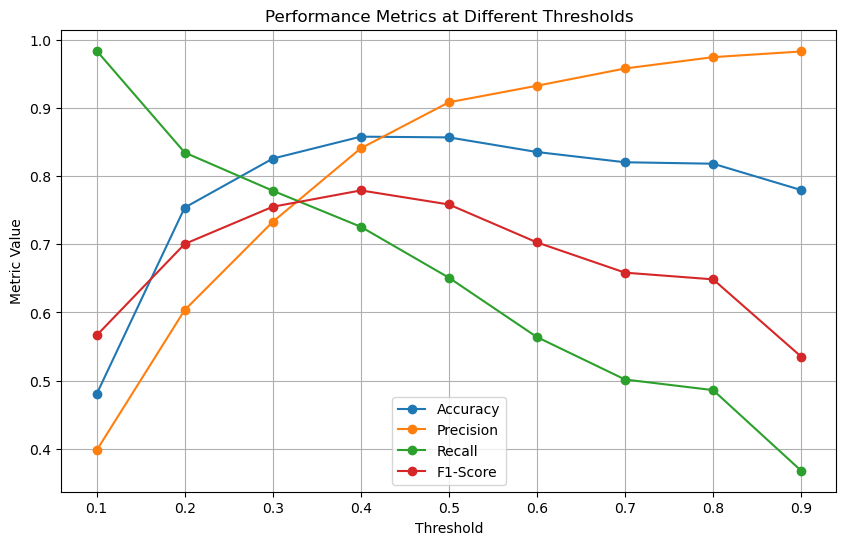

In [62]:
import matplotlib.pyplot as plt

# Extract metrics for plotting
thresholds = [result['Threshold'] for result in results]
accuracy = [result['Accuracy'] for result in results]
precision = [result['Precision'] for result in results]
recall = [result['Recall'] for result in results]
f1_scores = [result['F1-Score'] for result in results]

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy, label='Accuracy', marker='o')
plt.plot(thresholds, precision, label='Precision', marker='o')
plt.plot(thresholds, recall, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1-Score', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Performance Metrics at Different Thresholds')
plt.legend()
plt.grid()
plt.show()
